<a href="https://colab.research.google.com/github/GuysBarash/MLBook/blob/main/ex_a_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
from scipy.special import comb
import matplotlib.pyplot as plt

In [20]:
### Parameters
p = 0.01  # Probability of getting a defect
n = 1000  # products per batch in production line

k = 3  # Threshold for number of defects
alpha = 0.01  # likelihood of finding these or more defects

In [21]:
def prob_of_these_defects(t):
    # a function that calculated the probability of seeing exactly t defect in a production line
    coef_a = comb(n, t)
    coef_b = np.power(p, t)
    coef_c = np.power(1.0 - p, n - t)
    return coef_a * coef_b * coef_c


def prob_of_seeing_more_defects(k):
    # a function that calculated the prob of k or more defects
    t_vector = [prob_of_these_defects(t) for t in range(k, n + 1)]
    t_sum = np.sum(t_vector)
    return t_sum


In [22]:
### Run calculations
k_values = list()
k_results = list()
for k in range(2, int(n / 2)):
    likelihood_of_k_defects = prob_of_seeing_more_defects(k)
    k_results.append(likelihood_of_k_defects)
    k_values.append(k)

    if likelihood_of_k_defects < alpha * 0.001:
        break  # To save computational effort, when the likelihood drops significantly below alpha, we break

In [23]:
### Find optimal k
idx_of_closest = (np.abs(np.asarray(k_results) - alpha)).argmin()
optimal_k = k_values[idx_of_closest]
optimal_value = k_results[idx_of_closest]

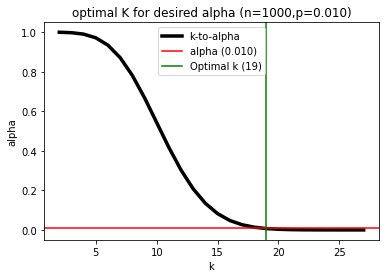

In [31]:
# plot
plt.plot(k_values, k_results, 'black', label='k-to-alpha', linewidth=3.5)
plt.axhline(y=alpha, color='r', label=f'alpha ({alpha:>.3f})')
plt.axvline(x=optimal_k, color='g', label=f'Optimal k ({optimal_k})')

plt.title(f'optimal K for desired alpha (n={n},p={p:>.3f})')
plt.ylabel('alpha')
plt.xlabel('k')
plt.legend()
plt.show()